In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
# class linear regression
# 1. fit data, kasih opsi fit_intercept==True
# 1.1. buat design matrix (A)
# 1.2. cari solusi, theta
# 1.3. ekstrak coef_ dan intercept_
# 2. buat predict => test di-dot productan (x_test x self.coef + self.intercept)

In [ ]:
# buat class kfold untuk cross validation
# 1. randomized index, kemudian split by foldnya
# 2. fold_size = pakai np.ones dari jumlah n_splits * n.samples//n_splits
# fold_size[n_samples%n_splits]+= 1 

In [ ]:
# indices = np.arrange(n_samples)

# np.random.seed(42)
# np.random.shuffle(indices)

# current = 0
# for size in fold_size:
#         start = current
#         end = current + size
#         test_index = indices[start:end]

#         current = end

In [18]:
class baseLinearRegression:
    def __init__(self, fit_intercept=True):
        # inisialisasi setup
        self.coef_ = None
        self.intercept = None
        self.fit_intercept = fit_intercept

    def fit(self, X, y):

        # handling different data type input
        if isinstance(X, pd.DataFrame):
            X = X.values
        else:
            X = np.array(X)
        if isinstance(y, pd.Series):
            y = y.values
        else:
            y = np.array(y)
        
        # buat design matrix A
        if self.fit_intercept:
            A = np.c_[np.ones((X.shape[0], 1)), X]
        else:
            A = X

        # hitung optimal coefficients 
        theta = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)

        # extract parameter
        if self.fit_intercept:
            self.intercept = theta[0]
            self.coef_ = theta[1:]
        else:
            self.intercept = 0.0
            self.coef_ = theta

    def predict(self, X):

        # handling different data type input
        if isinstance(X, pd.DataFrame):
            X = X.values
        else:
            X = np.array(X)

        y_pred = np.dot(X, self.coef_) + self.intercept

        return y_pred

In [19]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

print(X, y)

[[1 1]
 [1 2]
 [2 2]
 [2 3]] [ 6  8  9 11]


In [20]:
reg = baseLinearRegression()
reg.fit(X, y)

reg

In [21]:
print(reg.coef_)
print(reg.intercept)
print(reg.predict(np.array([[3, 5]])))

[1. 2.]
3.0
[16.]


In [22]:
# test dengan dataset
df = pd.read_csv("data/bmd.csv")
df.head(3)

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067


In [23]:
X_train = df[["age"]]
y_train = df["bmd"]

X_test = X_train.copy() + 1e-6

X_test

,age
0,57.052769
1,75.741226
2,70.778901
3,78.247176
4,54.191878
...,...
164,77.982544
165,50.285304
166,46.359722
167,54.788369


In [24]:
reg = baseLinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

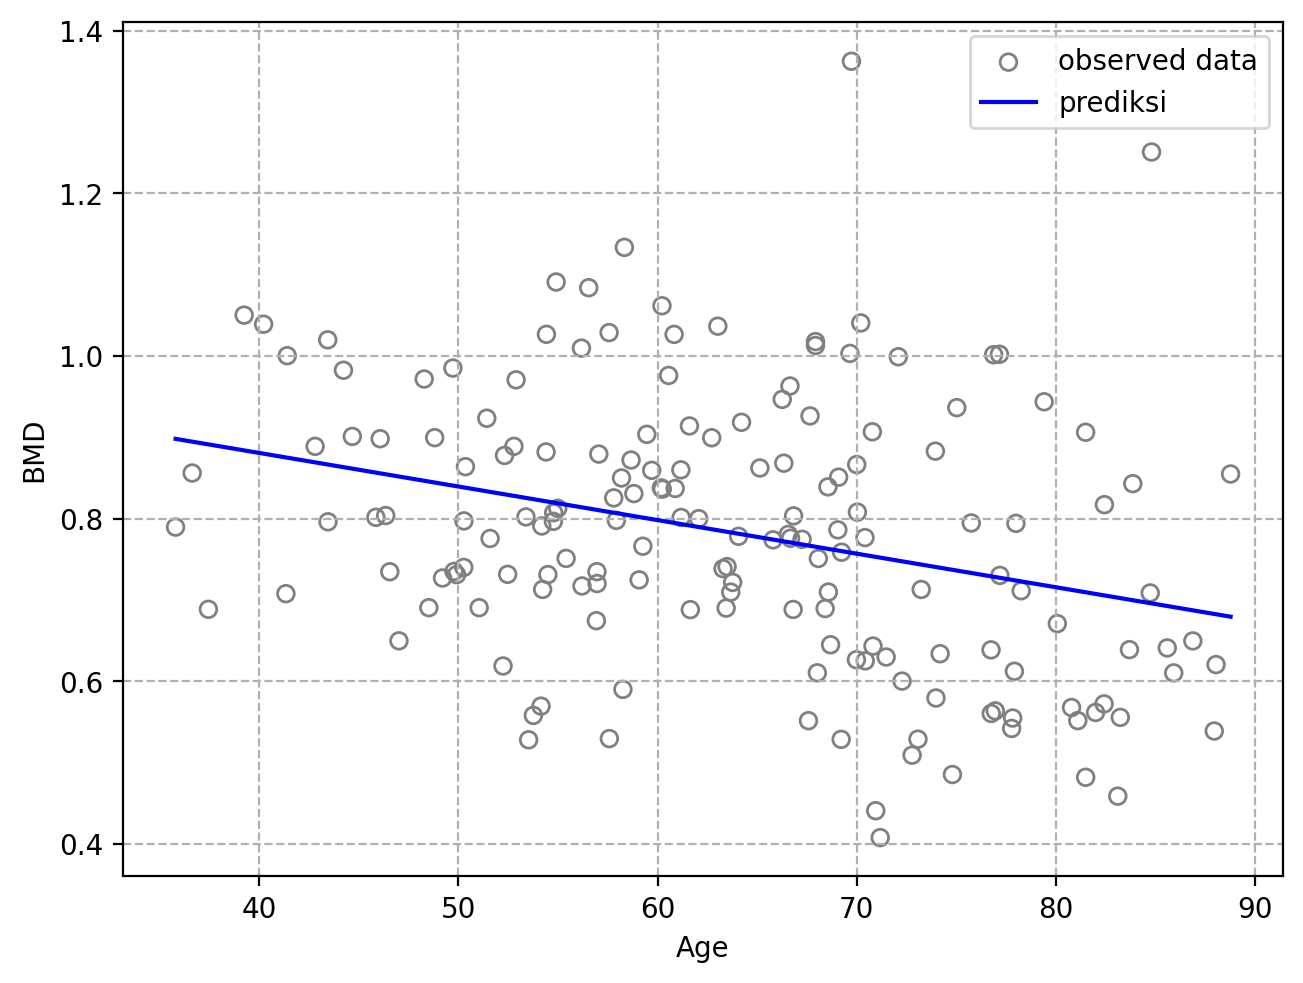

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, dpi=200)

ax.scatter(X_train, y_train, c="none", edgecolors='grey', label="observed data")
idx_sort = np.argsort(X_test['age']).to_list()
X_test_sorted = X_test.loc[idx_sort]
y_pred_sorted = y_pred[idx_sort]
ax.plot(X_test_sorted, y_pred_sorted, c='b', label="prediksi")

ax.legend()
ax.grid(linestyle="--")
ax.set_xlabel("Age")
ax.set_ylabel("BMD")
plt.show()